In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py

In [2]:
import allel

In [3]:
callset_fn = './raw_snps.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "raw_snps.h5" (mode r)>

In [4]:
calldata = callset['calldata']

In [5]:
variants = callset['variants']
variants


<HDF5 group "/variants" (39 members)>

In [6]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QUAL', 'AN', 'MQ', 'QD', 'SOR', 'MQRankSum', 'ReadPosRankSum', 'numalt'])
variants

<VariantChunkedTable shape=(80633785,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')]
   nbytes=5.4G cbytes=2.1G cratio=2.6
   values=h5py._hl.group.Group>

In [7]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(80633785, 370, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=55.6G cbytes=6.1G cratio=9.2
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [8]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(80633785, 7) dtype=int32 chunks=(37449, 7)
   nbytes=2.1G cbytes=371.9M cratio=5.8
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [9]:
biallelic = (ac.max_allele() == 1)
biallelic[:30]

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True])

In [10]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

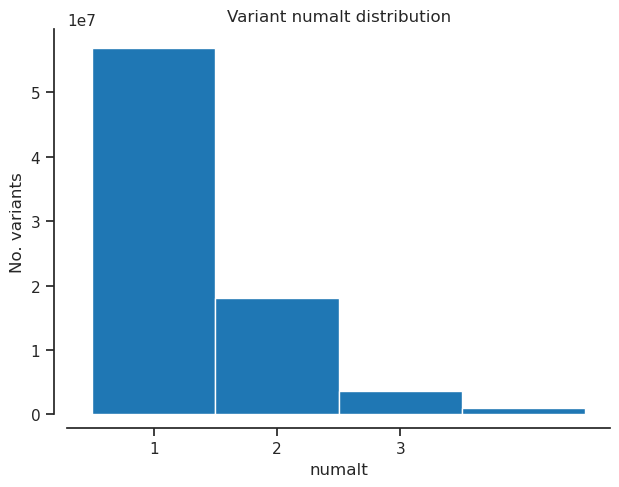

In [11]:
plot_variant_hist('numalt', bins=np.arange(0.5, 5.5, 1))
plt.gca().set_xticks([1,2,3])

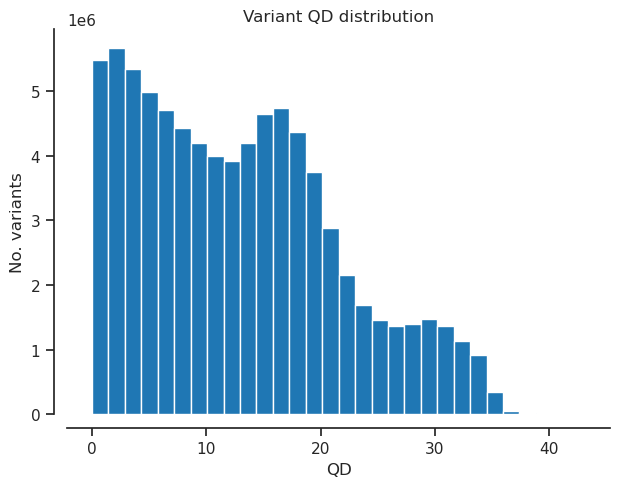

In [12]:
plot_variant_hist('QD')

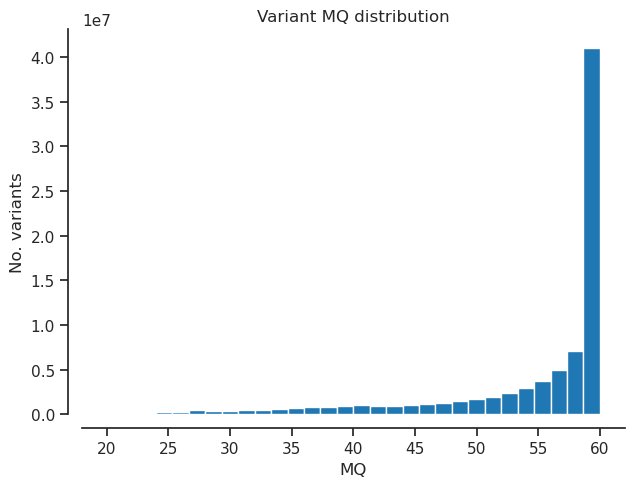

In [13]:
plot_variant_hist('MQ')

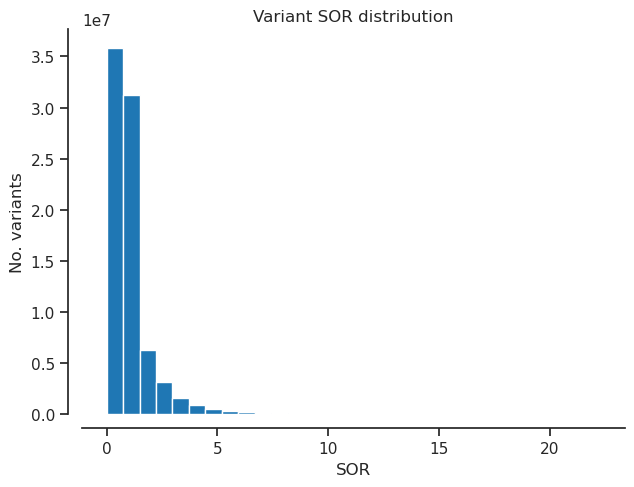

In [14]:
plot_variant_hist('SOR')

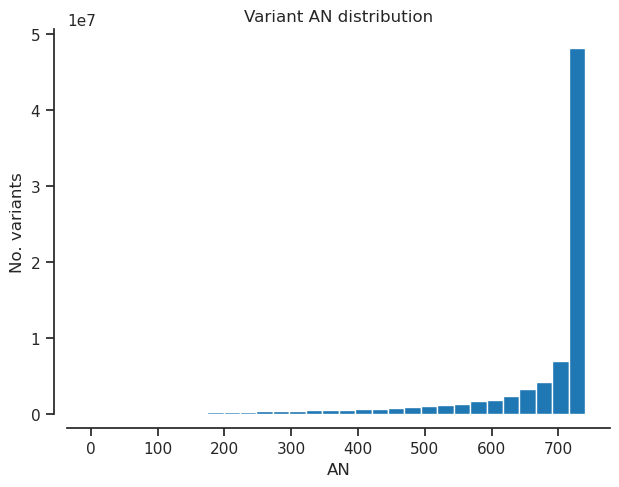

In [15]:
plot_variant_hist('AN')

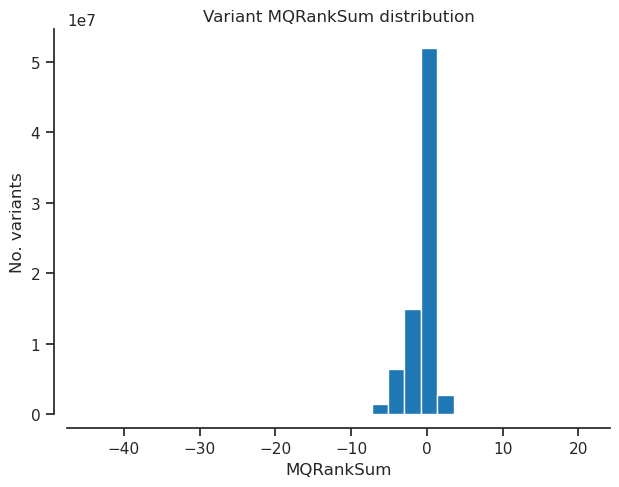

In [22]:
plot_variant_hist('MQRankSum')

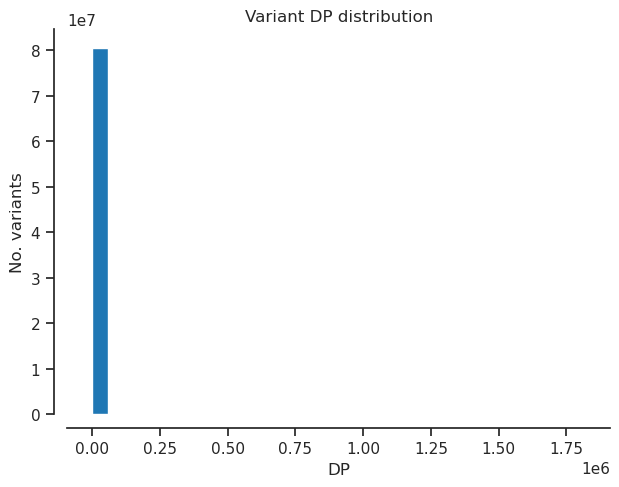

In [24]:
plot_variant_hist('DP')

In [ ]:
plot_variant_hist('ReadPosRankSum')

In [16]:
n_variants = len(genotypes)
n_variants

80633785

In [17]:
pc_missing = genotypes.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes.count_het(axis=0)[:] * 100 / n_variants

In [18]:
genotypes.count_het(axis=0)[0]

6614397

In [19]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 28)
    ax.bar(left, pc)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)

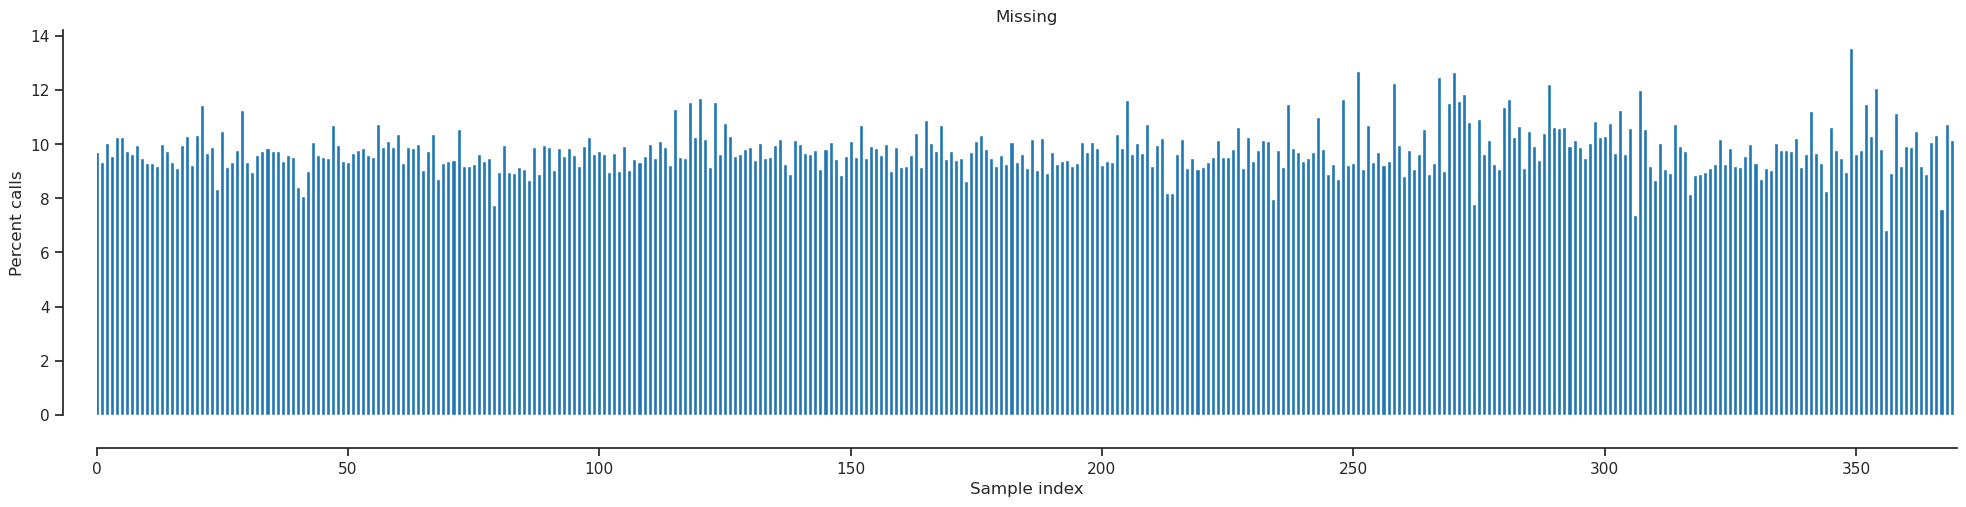

In [20]:
plot_genotype_frequency(pc_missing, 'Missing')


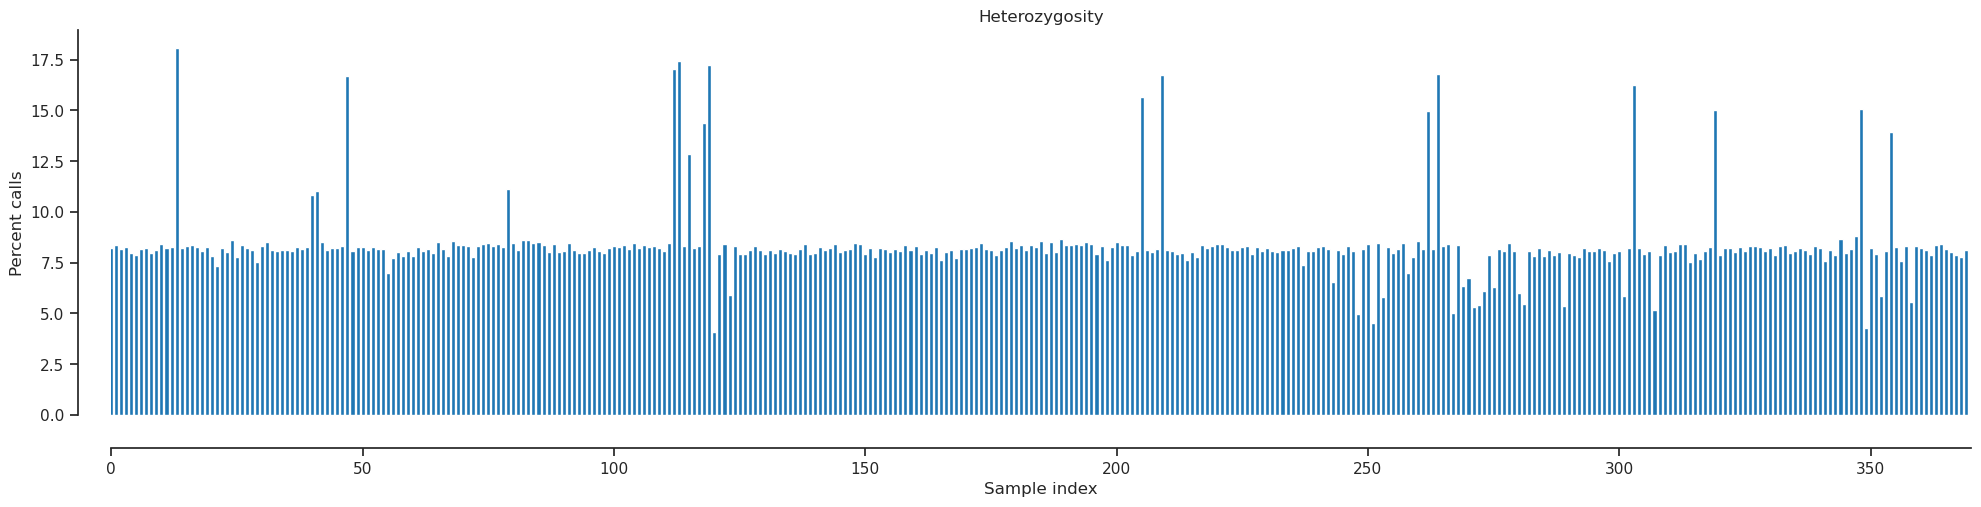

In [21]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

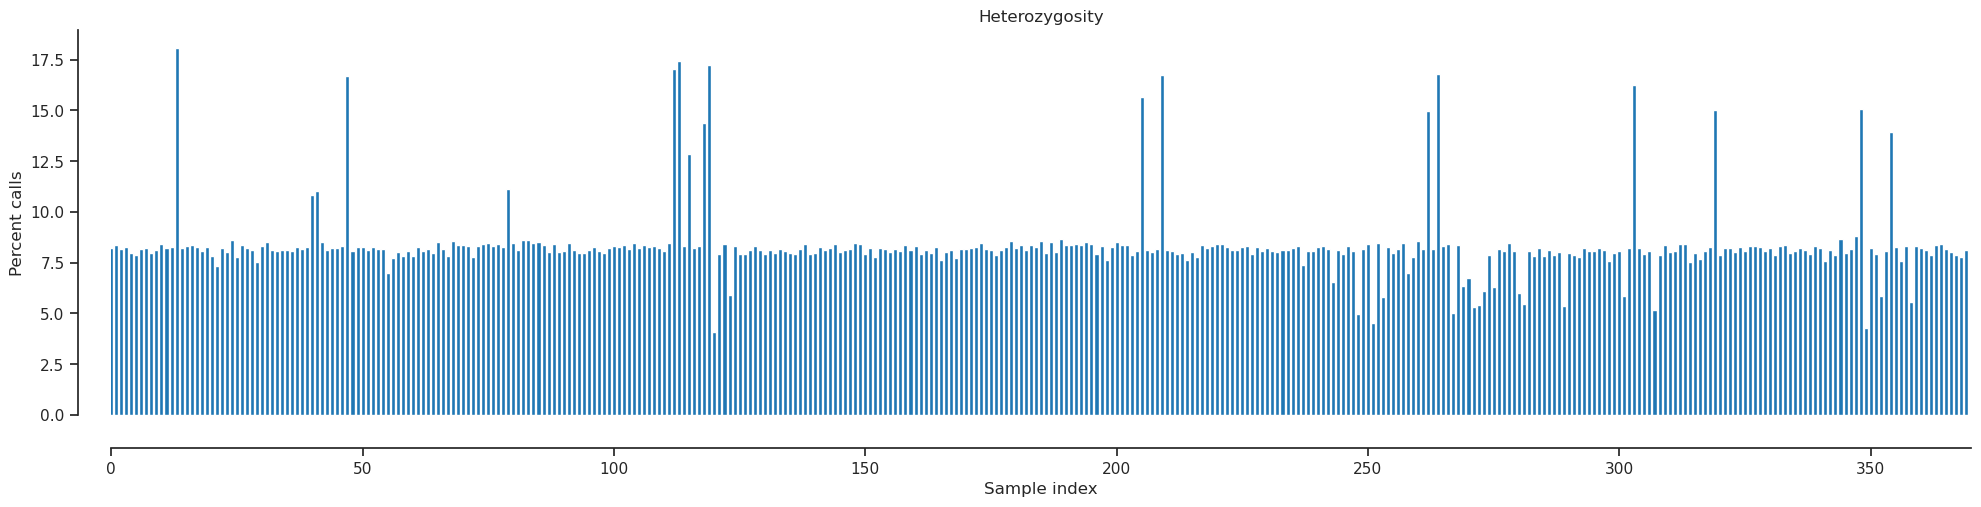

In [26]:
to_save = plot_genotype_frequency(pc_het, 'Heterozygosity')
plt.savefig('hetero_raw.png')